In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
p = pickle.load(open("predictions/filtered_o_tf_all_appliances_static_weather.pkl", 'r'))['filtered_tf_all_appliances_static_weather']

In [9]:
from common import *
import sys

In [19]:
out = {}
for appliance in p.keys():
    
    out[appliance] = {}
    for lat in range(1, 13):
        print '{0}\r'.format(appliance+" "+str(lat))
        sys.stdout.flush()
        pred =  p[appliance]['None']['None']['%d' %lat]
        if appliance=="hvac":
            pred = pred[range(4, 10)]
        
        out[appliance][lat] = compute_rmse_fraction(appliance, pred)[2]

hvac 1
hvac 2
hvac 3
hvac 4
hvac 5
hvac 6
hvac 7
hvac 8
hvac 9
hvac 10
hvac 11
hvac 12
wm 1
wm 2
wm 3
wm 4
wm 5
wm 6
wm 7
wm 8
wm 9
wm 10
wm 11
wm 12
fridge 1
fridge 2
fridge 3
fridge 4
fridge 5
fridge 6
fridge 7
fridge 8
fridge 9
fridge 10
fridge 11
fridge 12
mw 1
mw 2
mw 3
mw 4
mw 5
mw 6
mw 7
mw 8
mw 9
mw 10
mw 11
mw 12
oven 1
oven 2
oven 3
oven 4
oven 5
oven 6
oven 7
oven 8
oven 9
oven 10
oven 11
oven 12
aggregate 1
aggregate 2
aggregate 3
aggregate 4
aggregate 5
aggregate 6
aggregate 7
aggregate 8
aggregate 9
aggregate 10
aggregate 11
aggregate 12
dw 1
dw 2
dw 3
dw 4
dw 5
dw 6
dw 7
dw 8
dw 9
dw 10
dw 11
dw 12


In [32]:
pd.DataFrame(out).columns

Index([u'aggregate', u'dw', u'fridge', u'hvac', u'mw', u'oven', u'wm'], dtype='object')

In [33]:
out_df = pd.DataFrame(out)

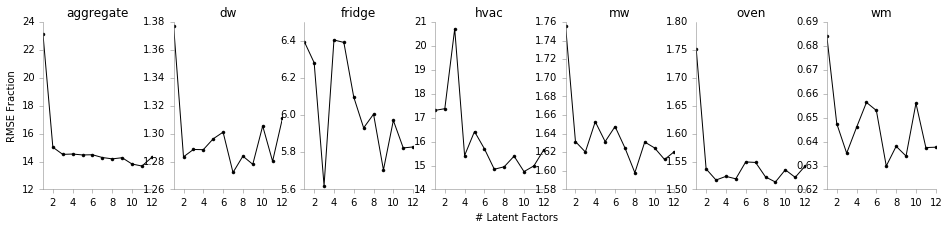

In [44]:
from plot_functions import *
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(16, 3))
for i, a in enumerate(ax):
    appliance = out_df.columns[i]
    out_df[appliance].plot(ax=a, style= 'k.-')
    format_axes(a)
    a.set_title(appliance)
ax[0].set_ylabel("RMSE Fraction")
fig.text(0.5, -0.02, '# Latent Factors')


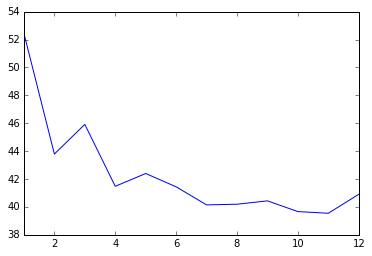

In [29]:
pd.DataFrame(out).sum(axis=1).plot()